In [1]:
import pandas as pd

* ### Gender분류

In [4]:
data=pd.read_csv("gender_classification_v7.csv")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [6]:
data['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
data['gender']=label_enc.fit_transform(data['gender'])

In [20]:
#특성과 타겟으로 분리
X = data.drop('gender', axis=1)
y= data['gender']
X.shape, y.shape


((5001, 7), (5001,))

In [21]:
cor_matrix=data.corr()
cor_matrix

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


<Axes: >

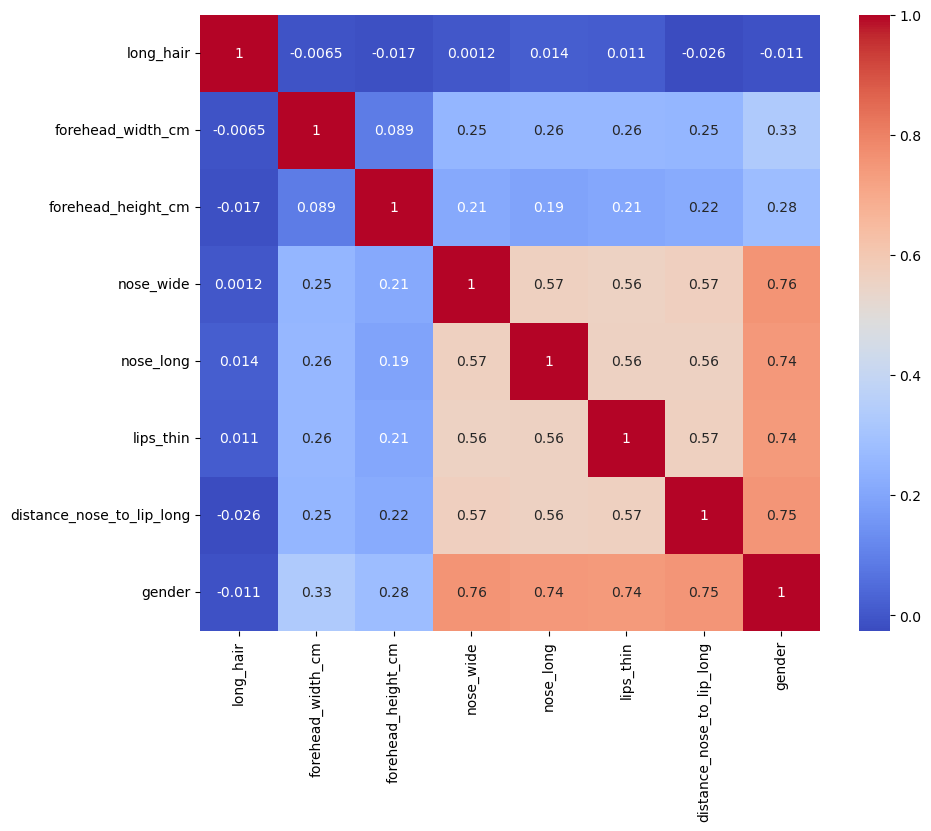

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

In [27]:
#데이터 분할: 훈련-테스트
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

In [29]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred.shape

(1001,)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9600399600399601

In [31]:
#크로스탭(교차분석표)
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
gender,,,
0,485,17,502
1,23,476,499
All,508,493,1001


In [32]:
model.coef_[0]

array([-0.34795504,  0.70739794,  0.97795645,  3.74982303,  3.51248038,
        3.30225391,  3.7444423 ])

In [35]:
imp = model.coef_[0]
feature_imp = pd.Series(imp,index=X.columns).abs().sort_values(ascending=True)
feature_imp #계수(중요도) 시리즈로?

long_hair                    0.347955
forehead_width_cm            0.707398
forehead_height_cm           0.977956
lips_thin                    3.302254
nose_long                    3.512480
distance_nose_to_lip_long    3.744442
nose_wide                    3.749823
dtype: float64